In [1]:
import pandas as pd
drinks=pd.read_csv('http://bit.ly/drinksbycountry')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [50]:
drinks.beer_servings.mean()
drinks.groupby('continent').beer_servings.size()

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: beer_servings, dtype: int64

In [4]:
drinks.groupby('continent').beer_servings.max()

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

In [5]:
#have other aggregations
drinks.groupby('continent').beer_servings.agg(['min','max','count','mean'])

,min,max,count,mean
continent,,,,
Africa,0,376,53,61.471698
Asia,0,247,44,37.045455
Europe,0,361,45,193.777778
North America,1,285,23,145.434783
Oceania,0,306,16,89.687500
South America,93,333,12,175.083333


In [6]:
#Accross all numeric columns
drinks.groupby('continent').agg(['min','max','count','mean'])

beer_servings                        spirit_servings             \
                        min  max count        mean             min  max count   
continent                                                                       
Africa                    0  376    53   61.471698               0  152    53   
Asia                      0  247    44   37.045455               0  326    44   
Europe                    0  361    45  193.777778               0  373    45   
North America             1  285    23  145.434783              68  438    23   
Oceania                   0  306    16   89.687500               0  254    16   
South America            93  333    12  175.083333              25  302    12   

                          wine_servings                         \
                     mean           min  max count        mean   
continent                                                        
Africa          16.339623             0  233    53   16.264151   
Asia            60.840909             0  123    44    9.068182   
Europe         132.555556             0  370    45  142.222222   
North America  165.739130             1  100    23   24.521739   
Oceania         58.437500             0  212    16   35.625000   
South America  114.750000             1  221    12   62.416667   

              total_litres_of_pure_alcohol                        
                                       min   max count      mean  
continent                                                         
Africa                                 0.0   9.1    53  3.007547  
Asia                                   0.0  11.5    44  2.170455  
Europe                                 0.0  14.4    45  8.617778  
North America                          2.2  11.9    23  5.995652  
Oceania                                0.0  10.4    16  3.381250  
South America                          3.8   8.3    12  6.308333

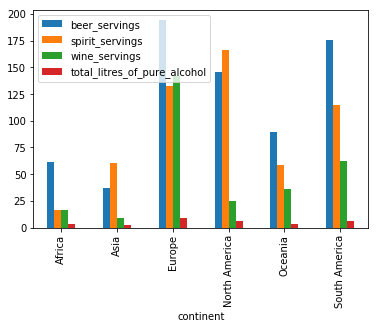

In [7]:
%matplotlib inline
drinks.groupby('continent').mean().plot(kind='bar')

In [24]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
 

In [26]:
data = pd.DataFrame.from_dict({'Name': ['China', 'Japan', 'Italy', 'Iran', 'Brazil'], 'Volume': [23, 12, 11, 34, 56]})
data.set_index('Name',inplace=True)

In [27]:
data.index.map(lambda x: ContinentDict[x])

Index(['Asia', 'Asia', 'Europe', 'Asia', 'South America'], dtype='object', name='Name')

In [28]:
#Working with nulls
ufo=pd.read_csv('http://bit.ly/uforeports')
ufo.isnull().tail() #similary notnull()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [29]:
#Count of null values in each column.
ufo.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [31]:
#Find all data with city as null
ufo[ufo.City.isnull()]

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00
1877,NaN,YELLOW,CIRCLE,AZ,8/15/1969 1:00
2013,NaN,NaN,NaN,NH,8/1/1970 9:30
2546,NaN,NaN,FIREBALL,OH,10/25/1973 23:30
3123,NaN,RED,TRIANGLE,WV,11/25/1975 23:00
4736,NaN,NaN,SPHERE,CA,6/23/1982 23:00


In [34]:
print(ufo.shape)
print(ufo.dropna(how='any').shape)

(18241, 5)
(2486, 5)


In [35]:
print(ufo.dropna(how='all').shape) #drop if all columns are na

(18241, 5)


In [37]:
print(ufo.dropna(subset=['City','Shape Reported'], how='any').shape) #drop if 'City' or 'Shape Reported' columns are na

(15576, 5)


In [41]:
ufo['Shape Reported'].value_counts(dropna=False) # find count of each items including nacounts

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
ROUND           2
CRESCENT        2
PYRAMID         1
DOME            1
FLARE           1
HEXAGON         1
Name: Shape Reported, dtype: int64

In [44]:
ufo['Shape Reported'].fillna('Various',inplace=True) # fill na with another value
ufo['Shape Reported'].value_counts(dropna=False)

LIGHT        2803
Various      2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
DOME            1
PYRAMID         1
FLARE           1
Name: Shape Reported, dtype: int64

In [47]:
import numpy as np
type(pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3))

pandas.core.categorical.Categorical

In [48]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3, labels=["bad", "medium", "good"])

[bad, good, medium, medium, good, bad]
Categories (3, object): [bad < medium < good]

In [3]:
import pandas as pd
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three', 'three', 'one'], 'B': range(6)})
print (df)

       A  B
0    one  0
1    one  1
2    two  2
3  three  3
4  three  4
5    one  5


In [9]:
grouped_df = df.groupby('A')

In [11]:
for key, item in grouped_df:
    print (grouped_df.get_group(key), "\n\n")

     A  B
0  one  0
1  one  1
5  one  5 


       A  B
3  three  3
4  three  4 


     A  B
2  two  2 




In [13]:
for key, item in grouped_df:
    print (key, "\n\n")

one 


three 


two 




In [44]:
for key, item in grouped_df:
    print (item, "\n\n")

     A  B
0  one  0
1  one  1
5  one  5 


       A  B
3  three  3
4  three  4 


     A  B
2  two  2 




In [47]:
#bad way!
for  item in grouped_df:
    print (item[1].min(), "\n\n")

A    one
B      0
dtype: object 


A    three
B        3
dtype: object 


A    two
B      2
dtype: object 




In [18]:
grouped_df.count()

,B
A,
one,3
three,2
two,1


In [48]:
for ch in map(chr,[65,66,67,68]):
    print(ch)

A
B
C
D
